1080 1920
ret2 160.0
(array([ 63,  65,  71,  73,  79,  81,  88,  90,  96,  98, 156, 158, 164,
       166, 172, 174, 181, 183, 189, 191, 351, 353, 360, 362, 368, 370,
       376, 378, 385, 387, 445, 447, 453, 455, 461, 463, 470, 472, 478,
       480], dtype=int64),)


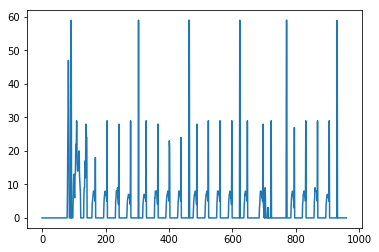

(array([ 80,  81,  82,  84,  85,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       160, 161, 162, 163, 164, 165, 166, 168, 196, 197, 198, 199, 200,
       201, 202, 203, 205, 233, 234, 235, 236, 237, 238, 239, 242, 270,
       271, 272, 273, 274, 275, 276, 279, 320, 321, 322, 323, 324, 325,
       326, 328, 355, 356, 357, 358, 359, 360, 361, 362, 365, 393, 394,
       395, 396, 397, 398, 399, 401, 402, 430, 431, 432, 433, 434, 435,
       436, 438, 479, 480, 481, 482, 483, 484, 485, 488, 516, 517, 518,
       519, 520, 521, 522, 524, 552, 553, 554, 555, 556, 557, 558, 559,
       561, 589, 590, 591, 592, 593, 594, 595, 596, 598, 639, 640, 641,
       642, 643, 644, 645, 647, 687, 688, 689, 690, 691, 692, 693, 694,
       696, 703, 722, 786, 787, 788, 789, 790, 791, 792, 795, 823, 824,
       825, 826, 827, 828, 829, 831, 859, 860, 861, 862, 863, 8

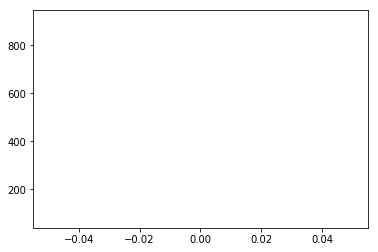

[[ 1  1  2  1 13  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1 11  1  1  1  1  1  1  1  1  1 19  1  1  1  1  1  1  2 28  1
   1  1  1  1  1  1  2 28  1  1  1  1  1  1  3 28  1  1  1  1  1  1  3 41
   1  1  1  1  1  1  2 27  1  1  1  1  1  1  1  3 28  1  1  1  1  1  1  2
   1 28  1  1  1  1  1  1  2 41  1  1  1  1  1  1  3 28  1  1  1  1  1  1
   2 28  1  1  1  1  1  1  1  2 28  1  1  1  1  1  1  1  2 41  1  1  1  1
   1  1  2 40  1  1  1  1  1  1  1  2  7 19 64  1  1  1  1  1  1  3 28  1
   1  1  1  1  1  2 28  1  1  1  1  1  1  1  2 29  1  1  1  1  1  1  2]]
4.319371727748691


In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Sahith/Desktop/IEEE Sheet Vision/ode_to_joy.jpg',0)
height, width = img.shape[:2]
print(height,width)
c1 = 540/height
c2 = 960/width

"""Resizing image"""
img_res = cv2.resize(img,(int(c2*width), int(c1*height)))#, interpolation = cv.INTER_CUBIC)


"""Otsu Binarisation"""
blur = cv2.GaussianBlur(img_res,(5,5),0)
if(c1 > 1.5 or c2 > 1.5):
    ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    print('ret2', ret2)
else:
    ret2,th2 = cv2.threshold(img_res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    print('ret2', ret2)
    
    
"""Canny Edge Detection"""
edges = cv2.Canny(th2,50,150,apertureSize = 3)
#cv2.imshow('edges', edges)
"""Erosion - to get only the horizontal lines
    Subtract erosion from edges to remove the staff lines"""
kernel = np.ones((1,5), np.uint8)

erosion = cv2.erode(edges, kernel, iterations = 1)
#cv2.imshow('erosion', erosion)

result = cv2.subtract(edges, erosion)
#cv2.imshow('result', result)

"""To find the y-values of staff lines"""
sum_rows = np.sum(edges, axis=1)
max_sum = np.amax(sum_rows)

ind = np.where(sum_rows > 0.45 * max_sum)
print(ind)

new_ind = ind[0][::2] + 1  ## contains y-values of staff lines

ref_ind = new_ind[::5] ## Reference value for each set of 5 staff lines
ref_ind2 = new_ind[4::5]

bw = cv2.bitwise_not(th2)
horizontal = bw.copy()
vertical = bw.copy()

cv2.waitKey(0)
cv2.destroyAllWindows()

#Staff line thickness
from collections import Counter
ind = ind[0][:]
a = [x - ind[i-1] for i,x in enumerate(ind)][1:]
data = Counter(a)
b = data.most_common(1)
slt = b[0][0] #slt is staff line thickness
slt

#Removing the horizontal lines
kernel_v = np.ones((2*slt,1),dtype = np.uint8)
bw_erode1 = cv2.erode(vertical,kernel_v,iterations = 1)
bw_dilate1 = cv2.dilate(bw_erode1,kernel_v,iterations = 1)
#cv2.imshow('bw_dilate',bw_dilate1)
cv2.waitKey(0)
cv2.destroyAllWindows()

vertical_not = cv2.bitwise_not(bw_dilate1) #vertical
#cv2.imshow('not',vertical_not)
cv2.imshow('bw_dilate',bw_dilate1)
smooth = vertical_not.copy()
blur1 = cv2.filter2D(smooth,-1,(np.ones((2,1),np.float32)/2))
#cv2.imwrite('C:/Users/Sahith/Desktop/IEEE Sheet Vision/staff_removal.jpg',blur1)
cv2.imshow('a',blur1)
cv2.waitKey(0)
cv2.destroyAllWindows()

###########################

template = cv2.imread('C:/Users/Sahith/Desktop/IEEE Sheet Vision/images/G-Clef/template_G_Clef.png',0)
h,w = template.shape[:2]

template1 = cv2.imread('C:/Users/Sahith/Desktop/IEEE Sheet Vision/images/F-Clef/template_F_Clef.png',0)
h1,w1 = template.shape[:2]

res = cv2.matchTemplate(blur1,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc_G_Clef = np.where( res >= threshold)
for pt in zip(*loc_G_Clef[::-1]):
    cv2.rectangle(blur1, pt, (pt[0] + w, pt[1] + h), (0,100,55), 2)

res1 = cv2.matchTemplate(blur1,template1,cv2.TM_CCOEFF_NORMED)
loc_F_Clef = np.where( res1 >= threshold)
for pt in zip(*loc_F_Clef[::-1]):
    cv2.rectangle(blur1, pt, (pt[0] + w1, pt[1] + h1), (10,10,0), 2)

cv2.imshow('result',blur1)
cv2.waitKey(0)
cv2.destroyAllWindows()




###########################
blur_inv = cv2.filter2D(bw_dilate1,-1,(np.ones((2,1),np.float32)/2))
count = np.zeros(960)

for i in range(55,125):
    for j in range(960):
        if(blur_inv[i][j]==255):
            count[j]=count[j]+1

#cv2.imshow('result2', result2)

count2 = np.zeros(225-125) 

for i in range(125,225):
    for j in range(624,659):
        if(blur_inv[i][j]==255):
            count2[i-125] = count2[i-125] + 1
############################


plt.plot(count)
plt.show()

seg1 = np.where((count>5) & (count<40))
print(seg1)

plt.plot(seg1)
plt.show()

seg_diff = np.diff(seg1)
print(seg_diff)

seg_mean = np.mean(seg_diff)
print(seg_mean)